In [156]:
import numpy as np
from visualisation.metric_extraction_tools import get_metrics_for_individual_run_from_path, \
    get_default_plot
from pathlib import Path
import os
from scipy.stats import t
content_root = Path(os.getcwd()).parent
checkpoints_dir = content_root / "checkpoints"

def get_target_accuracy(y):
    return max(list(map(float, y)))

def evaluate_runs(experiment_folder: Path, dataset_name, ax=None, multiplicator_centralised=10):
    experiment_runs = list(filter(lambda p: p.is_dir(), experiment_folder.iterdir()))
    target_accuracies = []

    for run in experiment_runs:
        centralised_metrics, _ = get_metrics_for_individual_run_from_path(run,
                                                                      multiplicator_centralised)

        x, y = centralised_metrics["accuracy"]
        target_accuracy = get_target_accuracy(y)
        target_accuracies.append(target_accuracy)

    minimum = min(target_accuracies)
    maximum = max(target_accuracies)
    std = np.std(target_accuracies)
    spread = maximum - minimum
    mean = np.mean(target_accuracies)
    df = 5 #len(target_accuracies)
    x = np.linspace(t.ppf(0.01, df, mean, std), t.ppf(0.99, df, mean, std), 100)
    y = t.pdf(x, df, mean, std)
    confidence_interval = t.ppf(0.25, df, mean, std), t.ppf(0.975, df, mean, std)

    print(f"Dataset: {dataset_name}")
    print(f"Minimum: {minimum}, Maximum: {maximum}, Spread: {spread}")
    print(f"Mean {mean} STD {std}")
    print(f"Confidence Interval: {confidence_interval}")
    if ax is None:
        fig, ax=get_default_plot()
    ax.plot(x, y, label="pdf")

Dataset: Celeba
Minimum: 0.8381037712097168, Maximum: 0.8524150252342224, Spread: 0.014311254024505615
Mean 0.8477638602256775 STD 0.00513512738650851
Confidence Interval: (0.8440322307126753, 0.8609641254141392)


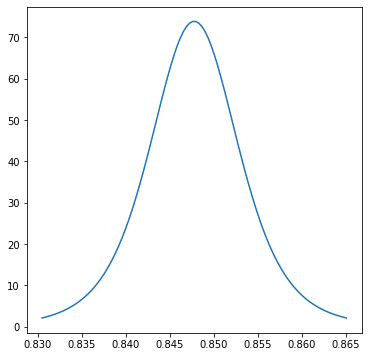

In [157]:
run_dir_celeba = checkpoints_dir / "Celeba_Fedavg_Standard_Deviation_Estimation" \
                              "/FullEval_FedAvg_SGD_lr0.01_nr200_nc5000_le1_i0"

evaluate_runs(run_dir_celeba, "Celeba")

Dataset: Femnist
Minimum: 0.5306793451309204, Maximum: 0.5457755327224731, Spread: 0.015096187591552734
Mean 0.5416971147060394 STD 0.00637527096316018
Confidence Interval: (0.5370642891714639, 0.5580852704474364)


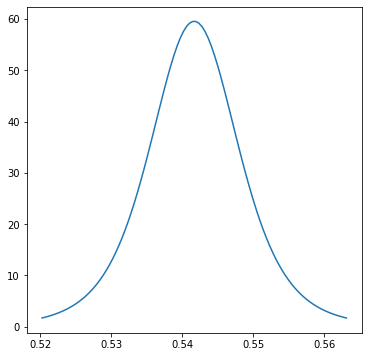

In [158]:
run_dir_fedavg = checkpoints_dir / "Femnist_Fedavg_Estimate_Standard_Deviation/FullEval_FedAvg_SGD_lr0.1_nr200_nc1000_le1_i0"

evaluate_runs(run_dir_fedavg, "Femnist")

Dataset: Cifar10
Minimum: 0.5486666560173035, Maximum: 0.5676666498184204, Spread: 0.018999993801116943
Mean 0.5552222232023875 STD 0.00595559144629401
Confidence Interval: (0.5508943732513301, 0.5705315584005289)


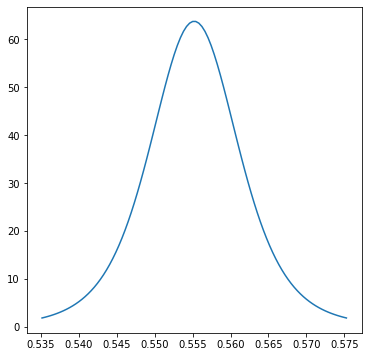

In [159]:
run_dir_fedavg = checkpoints_dir / "Cifar10_Lda_0" \
                                   "" \
                                   ".5_Fedavg_Standard_Deviation_Estimation_2/FullEval_FedAvg_SGD_lr0.1_nr200_nc100_le1_i0"

evaluate_runs(run_dir_fedavg, "Cifar10")

Dataset: Shakespeare
Minimum: 0.4499340355396271, Maximum: 0.46168604493141174, Spread: 0.011752009391784668
Mean 0.4540712237358093 STD 0.004599698308355685
Confidence Interval: (0.4507286834896876, 0.465895124661176)


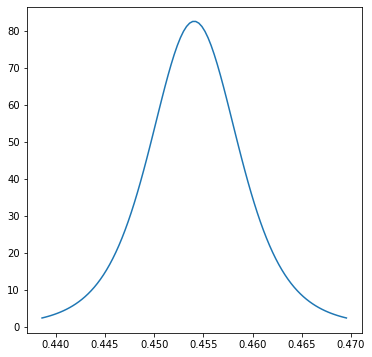

In [160]:
run_dir_fedavg = checkpoints_dir / "Shakespeare_Fedavg_Estimate_Standard_Deviation/FullEval_FedAvg_SGD_lr0.8_nr25_nc798_le1_i0"

evaluate_runs(run_dir_fedavg, "Shakespeare")